#### Data set: SalaryData_Train and SalaryData_Test

Prepare a classification model using Naive Bayes for salary data

Data Description: age -- age of a person workclass -- A work class is a grouping of work education -- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation -- occupation of an individuals relationship --
race -- Race of an Individual sex -- Gender of an Individual capitalgain -- profit received from the sale of an investment
capitalloss -- A decrease in the value of a capital asset hoursperweek -- number of hours work per week
native -- Native of an individual Salary -- salary of an individual

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
salary_data_train=pd.read_csv(r"C:\Users\rajes\Downloads\SalaryData_Train.csv")
salary_data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
salary_data_test=pd.read_csv(r"C:\Users\rajes\Downloads\SalaryData_Test.csv")
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Initial Investigation


In [8]:
salary_data_train.shape

(30161, 14)

In [9]:
salary_data_test.shape

(15060, 14)

In [10]:
salary_data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
salary_data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
salary_data_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [13]:
salary_data_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [14]:
salary_data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
salary_data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='Salary', ylabel='hoursperweek'>

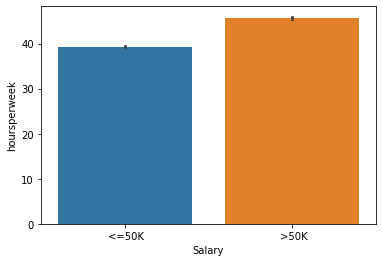

In [16]:
sns.barplot(x='Salary',y='hoursperweek',data=salary_data_train)

<AxesSubplot:xlabel='Salary', ylabel='count'>

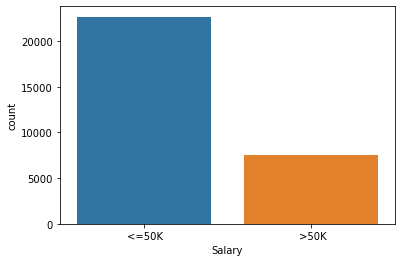

In [17]:
sns.countplot(x='Salary',data =salary_data_train)

Text(0.5, 1.0, 'HeatMap of Features')

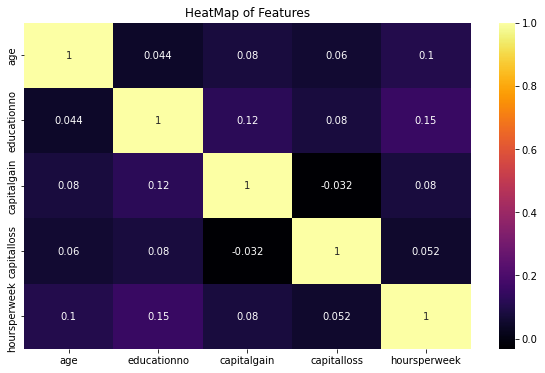

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(salary_data_train.corr(),annot=True,cmap="inferno")
plt.title("HeatMap of Features")

## Data Preprocessing


In [19]:
le=LabelEncoder()
salary_data_train['workclass']=le.fit_transform(salary_data_train['workclass'])
salary_data_train['education']=le.fit_transform(salary_data_train['education'])
salary_data_train['maritalstatus']=le.fit_transform(salary_data_train['maritalstatus'])
salary_data_train['occupation']=le.fit_transform(salary_data_train['occupation'])
salary_data_train['relationship']=le.fit_transform(salary_data_train['relationship'])
salary_data_train['race']=le.fit_transform(salary_data_train['race'])
salary_data_train['sex']=le.fit_transform(salary_data_train['sex'])
salary_data_train['native']=le.fit_transform(salary_data_train['native'])
salary_data_train['Salary']=le.fit_transform(salary_data_train['Salary'])
salary_data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [20]:
salary_data_train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [21]:
le=LabelEncoder()
salary_data_test['workclass']=le.fit_transform(salary_data_test['workclass'])
salary_data_test['education']=le.fit_transform(salary_data_test['education'])
salary_data_test['maritalstatus']=le.fit_transform(salary_data_test['maritalstatus'])
salary_data_test['occupation']=le.fit_transform(salary_data_test['occupation'])
salary_data_test['relationship']=le.fit_transform(salary_data_test['relationship'])
salary_data_test['race']=le.fit_transform(salary_data_test['race'])
salary_data_test['sex']=le.fit_transform(salary_data_test['sex'])
salary_data_test['native']=le.fit_transform(salary_data_test['native'])
salary_data_test['Salary']=le.fit_transform(salary_data_test['Salary'])
salary_data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [22]:
salary_data_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

## Model Building

In [23]:
X_train=salary_data_train.drop('Salary',axis=1)
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [24]:
Y_train=salary_data_train['Salary']
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [25]:
X_test=salary_data_test.drop('Salary',axis=1)
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [26]:
Y_test=salary_data_test['Salary']
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(30161, 13)
(15060, 13)
(30161,)
(15060,)


## Model Training with MultinomialNB

In [28]:
MB_model=MultinomialNB()

In [29]:
MB_model.fit(X_train,Y_train)

MultinomialNB()

## Model Testing

In [30]:
y_train_pred=MB_model.predict(X_train)
y_train_pred

array([1, 0, 0, ..., 0, 0, 1])

In [31]:
y_test_pred=MB_model.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 1, 0])

## Model Evaluation

Training Data

In [33]:
print(confusion_matrix(Y_train,y_train_pred))

[[21717   936]
 [ 5913  1595]]


In [34]:
print(classification_report(Y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22653
           1       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



0.5855605166699157


Text(0, 0.5, 'True Positive Rate')

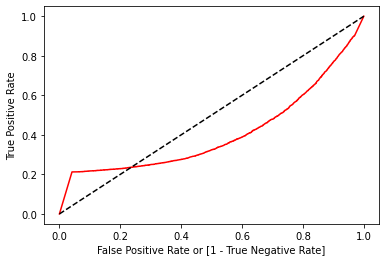

In [35]:
fpr, tpr, thresholds = roc_curve(Y_train,MB_model.predict_proba (X_train)[:,1])
auc = roc_auc_score(Y_train,y_train_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='MB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [36]:
print(confusion_matrix(Y_test,y_test_pred))

[[10891   469]
 [ 2920   780]]


In [37]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



0.5847627997716026


Text(0, 0.5, 'True Positive Rate')

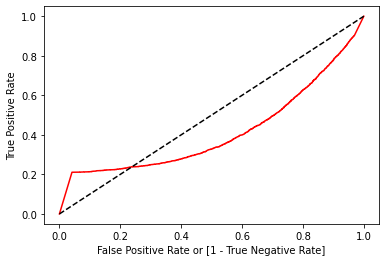

In [38]:
fpr, tpr, thresholds = roc_curve(Y_test,MB_model.predict_proba (X_test)[:,1])
auc = roc_auc_score(Y_test,y_test_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='MB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## Model Training with GaussianNB

In [39]:
GB_model=GaussianNB()

In [40]:
GB_model.fit(X_train,Y_train)

GaussianNB()

## Model Testing

In [41]:
Y_train_pred=GB_model.predict(X_train)
Y_train_pred

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
Y_test_pred=GB_model.predict(X_test)
Y_test_pred

array([0, 0, 0, ..., 0, 1, 0])

## Model Evaluation

Training Data

In [43]:
print(confusion_matrix(Y_train,Y_train_pred))

[[21505  1148]
 [ 5025  2483]]


In [44]:
print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     22653
           1       0.68      0.33      0.45      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.64      0.66     30161
weighted avg       0.78      0.80      0.77     30161



0.640018145361909


Text(0, 0.5, 'True Positive Rate')

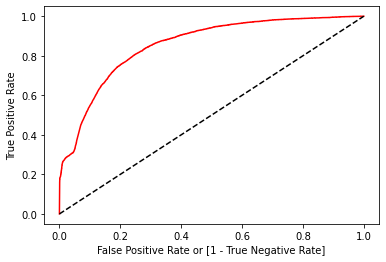

In [45]:
fpr, tpr, thresholds = roc_curve(Y_train,GB_model.predict_proba (X_train)[:,1])
auc = roc_auc_score(Y_train,Y_train_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='GB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [46]:
print(confusion_matrix(Y_test,Y_test_pred))

[[10759   601]
 [ 2491  1209]]


In [47]:
print(confusion_matrix(Y_test,Y_test_pred))

[[10759   601]
 [ 2491  1209]]


0.636925913589646


Text(0, 0.5, 'True Positive Rate')

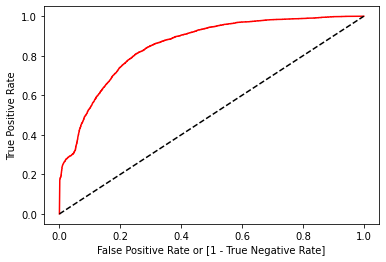

In [48]:
fpr, tpr, thresholds = roc_curve(Y_test,GB_model.predict_proba (X_test)[:,1])
auc = roc_auc_score(Y_test,Y_test_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='GB model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

Using MultinomialNB,Training accuracy-77% Testing accuracy-77%

Using GaussianNB,Training accuracy-80% Testing accuracy-87%